# Q1: Import  libraries and read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


# Additional EDA Steps Select important coulmns

In [2]:
selected_columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

# Select the specific columns
selected_data = df[selected_columns]
selected_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


# Q3: Print information about the dataset

In [3]:
# Essential EDA Steps

print("Data shape: {}\n".format(selected_data.shape))
print("Data size: {}\n".format(selected_data.size))
print("Data types: \n{}\n".format(selected_data.dtypes))
print("Null values: \n{}".format(selected_data.isnull().sum()))
print("Total null: {}".format(selected_data.isnull().sum().sum()))

Data shape: (6704, 6)

Data size: 40224

Data types: 
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Null values: 
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
Total null: 17


In [4]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
# describe numerical columns
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [6]:
# describe categorical columns
df.describe(exclude="number")

,Gender,Education Level,Job Title,Country,Race
count,6702,6701,6702,6704,6704
unique,3,7,193,5,10
top,Male,Bachelor's Degree,Software Engineer,USA,White
freq,3674,2267,518,1360,1968


In [7]:
df['Salary'].describe()

count      6699.000000
mean     115326.964771
std       52786.183911
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

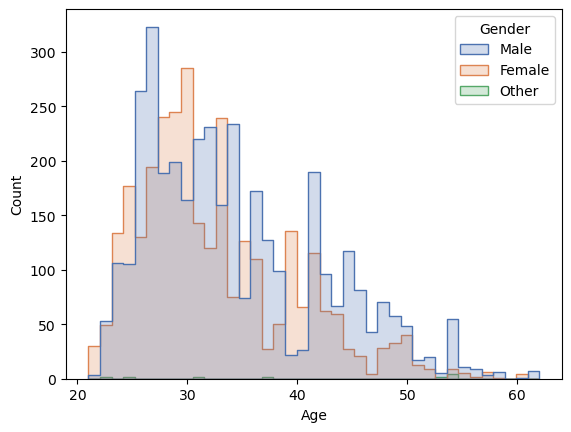

In [8]:
sns.histplot(data=selected_data,x='Age',hue='Gender',palette='deep',element='step')
plt.show()

# start preprocessing

In [9]:
print(df.isnull().sum())
print("Total null value: {}".format(df.isnull().sum().sum()))

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64
Total null value: 17


In [10]:
selected_data.duplicated().sum()

4912

In [11]:
# drop duplicate elements
selected_data = selected_data.drop_duplicates()
selected_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [12]:
selected_data.duplicated().sum()

0

In [13]:
selected_data = selected_data.dropna(inplace=False)
print(selected_data.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [14]:
# Change the Age coulmn data type to integer
selected_data = selected_data.dropna(inplace=False)
selected_data['Age'] = selected_data['Age'].astype(int)
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   int32  
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 90.7+ KB


In [15]:
selected_data.isnull().sum().sum()

0

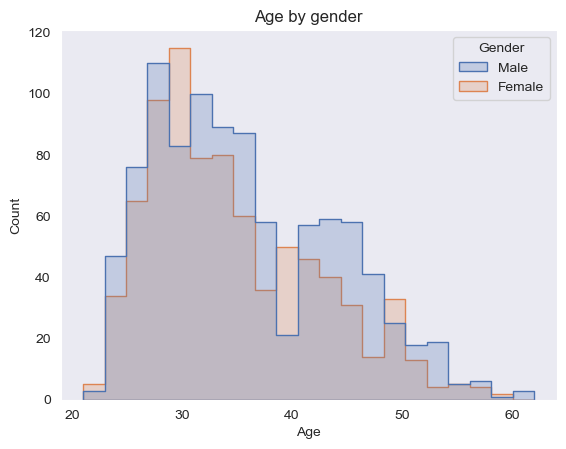

In [16]:
# Keep only rows with 'Male' and 'Female' in the 'Gender' column
selected_data = selected_data[selected_data['Gender'].isin(['Male', 'Female'])]

sns.set_style('dark')
plt.title("Age by gender")
sns.histplot(data=selected_data,x='Age',hue='Gender',palette='deep',element='step');

In [17]:
selected_data[["Education Level", "Job Title"]].groupby("Education Level").count()

,Job Title
Education Level,
Bachelor's,262
Bachelor's Degree,506
High School,104
Master's,122
Master's Degree,445
PhD,340
phD,1


In [18]:
# Uniform the names of qualifications

selected_data['Education Level'] = selected_data['Education Level'].replace("Bachelor's Degree", "Bachelor's")
selected_data['Education Level'] = selected_data['Education Level'].replace("Master's Degree", "Master's")
selected_data['Education Level'] = selected_data['Education Level'].replace("phD", "PhD")
selected_data[["Education Level", "Job Title"]].groupby("Education Level").count()

,Job Title
Education Level,
Bachelor's,768
High School,104
Master's,567
PhD,341


# Use pandas profiling.

In [19]:
from pandas_profiling import ProfileReport 

C:\Users\HP\AppData\Local\Temp\ipykernel_17444\2406390103.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
profile = ProfileReport(selected_data, title= " Report ")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

In [21]:
sns.set_style("dark")
sns.set_palette("muted")
plt.figure(figsize=(10, 6))
sns.set(rc={"legend.fontsize": 12})

<Figure size 1000x600 with 0 Axes>

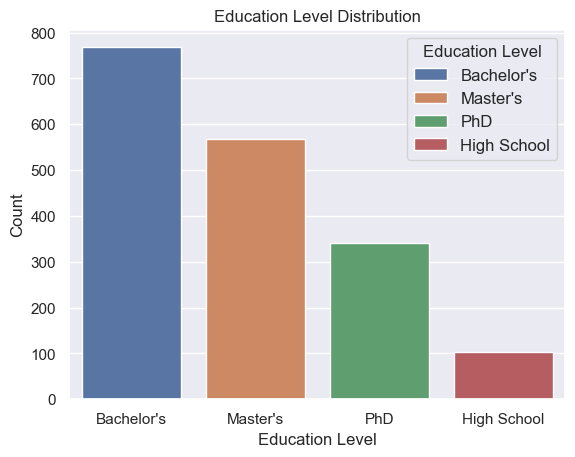

In [22]:
ax = sns.countplot(x='Education Level', data=selected_data)

handles = ax.patches
labels = selected_data['Education Level'].unique()
ax.legend(handles, labels, title="Education Level")

plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count");

- A lot of people completed their study after high school

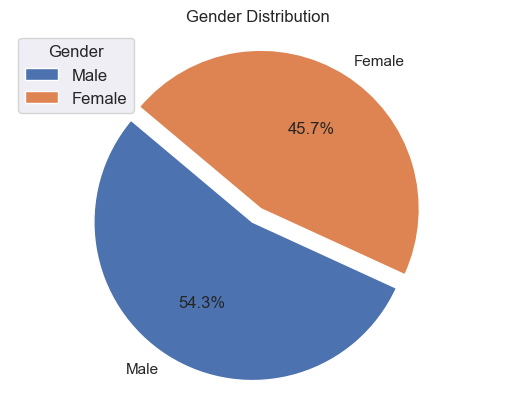

In [23]:
gender_counts = selected_data['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,explode = [0.0,0.1])
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, title="Gender", loc="upper left");

In [24]:
selected_data[["Gender", "Job Title"]].groupby("Gender").count()

,Job Title
Gender,
Female,814
Male,966


# Insights
- Numbers of men more than women

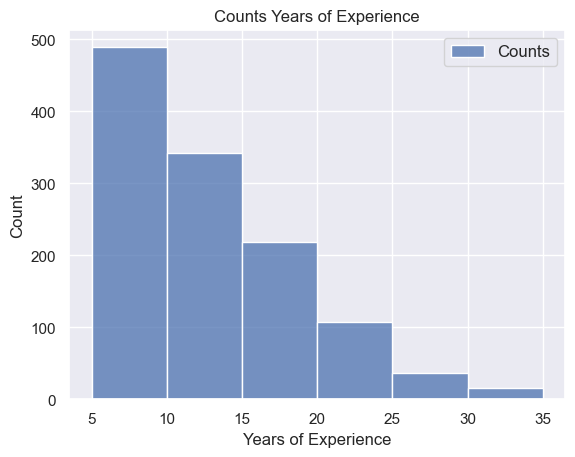

In [25]:
bins=(5,10,15,20,25,30,35)
sns.histplot(selected_data["Years of Experience"],bins=bins) 
plt.legend(["Counts"])
plt.title("Counts Years of Experience");

- A lot of employees have short experience
- the amount of experience decreases during years

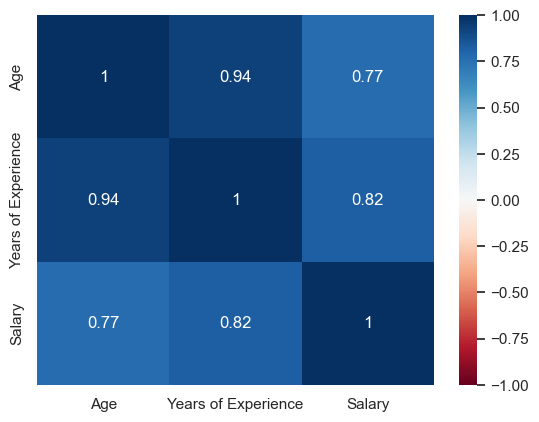

In [26]:
numeric_columns = selected_data[['Age','Years of Experience','Salary']]
sns.heatmap(data=numeric_columns.corr(),annot=True ,vmin=-1,vmax=1,cmap='RdBu')
plt.show()

##### relationships and correlations
- We observe that the proportions are close between age and years of experience, indicating a positive correlation relationship.
- Also, we notice that the proportions are close between salary and years of experience.
- The least correlation is observed between salary and age.

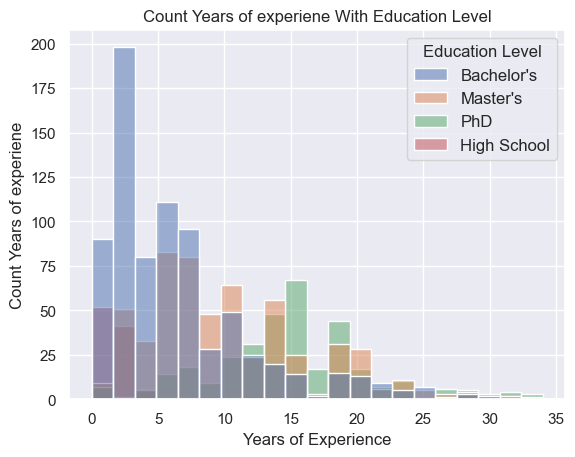

In [27]:
sns.histplot(x='Years of Experience', hue='Education Level',data=selected_data);#,multiple='stack'
plt.title('Count Years of experiene With Education Level')
plt.xlabel('Years of Experience')
plt.ylabel('Count Years of experiene')
plt.show()

- Individuals with a high school diploma have experience ranging from a month to 3 years.
- Those with a bachelor's degree have experience ranging from a few months to 7 years.
- People with a PhD or master's degree have experience ranging from 8 years to 16 years.
- The number of employed individuals starts to decrease after 20 years of experience.

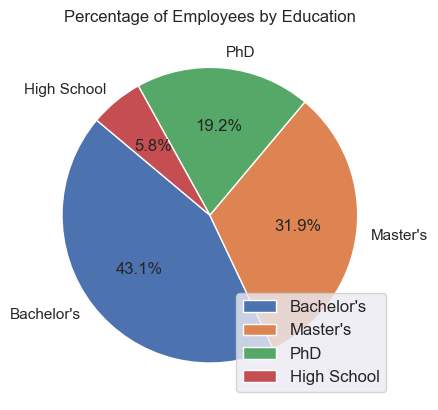

In [28]:
education_counts = selected_data['Education Level'].value_counts()

# Plot a pie chart
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, )
plt.legend(loc="lower right")
plt.title('Percentage of Employees by Education')
plt.show()

- There are a few workforce employees who have only a High School's degree
- the majority of employees have a bachelor's degree at 43% and Master's at One-third percent.

In [29]:
selected_data[["Education Level", "Job Title"]].groupby("Education Level").count()

,Job Title
Education Level,
Bachelor's,768
High School,104
Master's,567
PhD,341


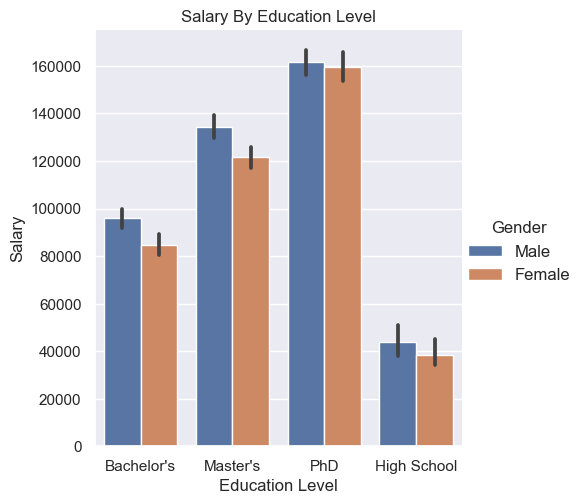

In [30]:
sns.catplot(x="Education Level", y="Salary", hue="Gender", kind="bar", data=selected_data)
plt.title("Salary By Education Level");

- Individuals with a PhD generally tend to have higher salaries compared to other education levels.
- individuals with higher education levels tend to have higher average salaries.
- Males receive higher salaries than females All time.
- Males and females have nearly same amount of salary with a PhD degree.

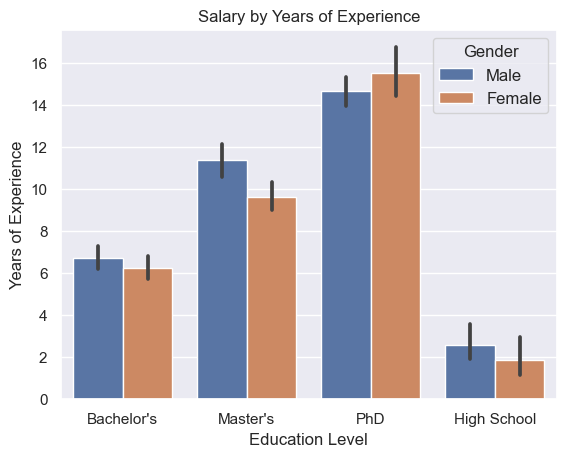

In [31]:
sns.barplot(x="Education Level", y="Years of Experience", hue="Gender", data=selected_data)
plt.title("Salary by Years of Experience");

- Females with a PhD generally tend to have higher Experience compared to males in same education level.

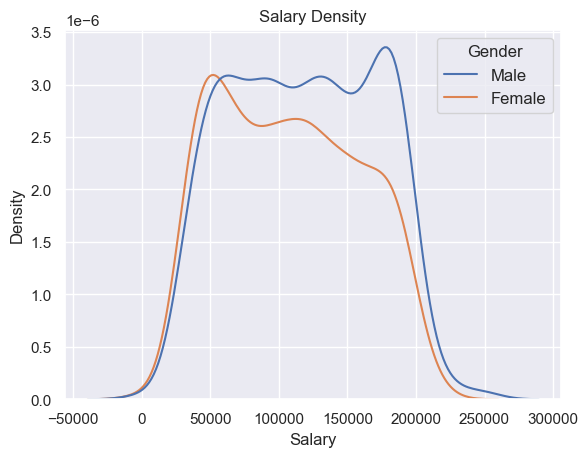

In [32]:
sns.kdeplot(data=selected_data, x="Salary", hue="Gender")
plt.title("Salary Density");

- Most of males have salary bigger than female 

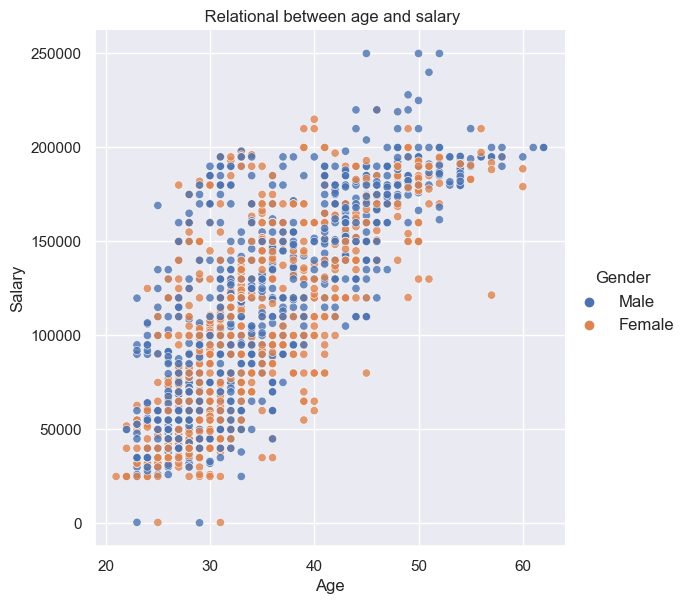

In [33]:
sns.relplot(x="Age", y="Salary",hue="Gender", alpha=0.8 ,height=6, data=selected_data)

plt.title(" Relational between age and salary");

- When age of employee increase salary ancrease as well

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


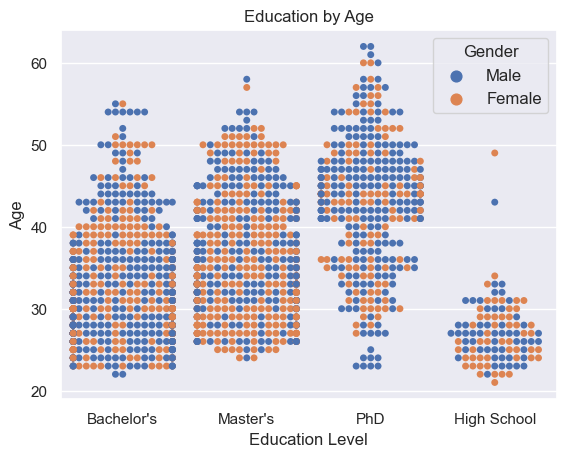

In [34]:
sns.swarmplot(
    y="Age",
    x="Education Level", 
    hue="Gender", 
    data=selected_data
)

plt.title("Education by Age");

- Most of females have Master or Bachelor degree.
- Most of people who have high school degree are young.

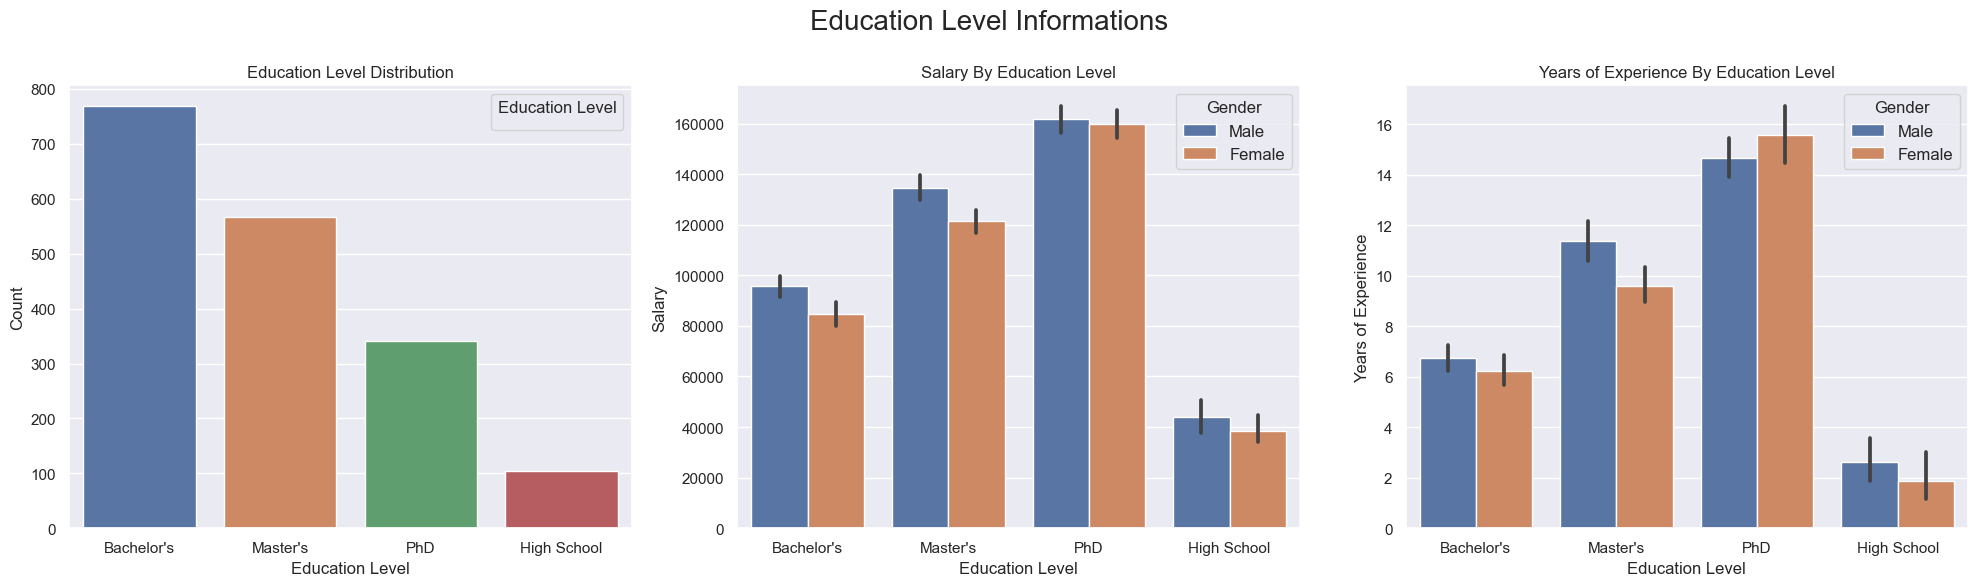

In [35]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[20, 6])
plt.suptitle('Education Level Informations',fontsize = 20)

#first
plt.subplot(1, 3, 1)
ax = sns.countplot(x='Education Level', data=selected_data)
ax.set_title("Education Level Distribution")
ax.set_xlabel("Education Level")
ax.set_ylabel("Count")

# Add legend to subplot 1
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Education Level")

#second
plt.subplot(1, 3, 2)
sns.barplot(x="Education Level", y="Salary", hue="Gender", data=selected_data)
plt.title("Salary By Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")

#third
plt.subplot(1, 3, 3)
sns.barplot(x="Education Level", y="Years of Experience", hue="Gender", data=selected_data)
plt.title("Years of Experience By Education Level")
plt.xlabel("Education Level")
plt.ylabel("Years of Experience")

plt.tight_layout()

plt.show()